In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
df=pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
print('Shape of Dataset',df.shape)
df.head()


Shape of Dataset (12684, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [320]:
df=df.drop(df.iloc[:,14:15],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [321]:
df=df.drop_duplicates()

In [322]:
df=df.dropna()
print('New Shape of DataSet',df.shape)


New Shape of DataSet (12007, 25)


In [323]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

In [325]:
set(df['destination'].tolist())

{'Home', 'No Urgent Place', 'Work'}

In [326]:
df1=df.copy()
df1['income']=df['income'].replace({'Less than $12500':0,'$12500 - $24999':1,'$25000 - $37499':2,
                                    '$37500 - $49999':3,'$50000 - $62499':4,'$62500 - $74999':5,
                                    '$75000 - $87499':6,'$87500 - $99999':7,'$100000 or More':8}).astype('int')
df1['Bar']=df1['Bar'].replace({'less1':0,'1~3':2,'4~8':3,'gt8':4,'never':5}).astype('int')
df1['destination']=df1['destination'].replace({'Home':0, 'No Urgent Place':1, 'Work':2}).astype('int')
df1['CarryAway']=df1['CarryAway'].replace({'less1':0,'1~3':2,'4~8':3,'gt8':4,'never':5}).astype('int')
df1['CoffeeHouse']=df1['CoffeeHouse'].replace({'less1':0,'1~3':2,'4~8':3,'gt8':4,'never':5}).astype('int')
df1['RestaurantLessThan20']=df1['RestaurantLessThan20'].replace({'less1':0,'1~3':2,'4~8':3,'gt8':4,'never':5}).astype('int')
df1['Restaurant20To50']=df1['Restaurant20To50'].replace({'less1':0,'1~3':2,'4~8':3,'gt8':4,'never':5}).astype('int')
df1['education']=df1['education'].replace({'Associates degree':3,'Some college - no degree':0,
                                           'Some High School':1,'High School Graduate':2,
                                           'Bachelors degree':4,'Graduate degree (Masters or Doctorate)':5}).astype('int')
df1['passanger']=df1['passanger'].replace({'Alone':0,'Friend(s)':1,'Kid(s)':2,'Partner':3}).astype('int')
df1['weather']=df1['weather'].replace({'Rainy':0,'Snowy':1,'Sunny':2}).astype('int')
df1['age']=df1['age'].replace({'21':1, '26':2, '31':3, '36':4, '41':5, '46':6, '50plus':7, 'below21':0}).astype('int')
df1['gender']=df1['gender'].replace({'Female':0, 'Male':1}).astype('int')
df1['coupon']=df1['coupon'].replace({'Bar':0,'Carry out & Take away':1,'Coffee House':2,'Restaurant(20-50)':3,'Restaurant(<20)':4}).astype('int')
df1['maritalStatus']=df1['maritalStatus'].replace({'Divorced':3, 'Married partner':2, 'Single':0, 'Unmarried partner':1, 'Widowed':4}).astype('int')



In [327]:
df1=df1.drop(columns='toCoupon_GEQ5min')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  int64 
 1   passanger             12007 non-null  int64 
 2   weather               12007 non-null  int64 
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  int64 
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  int64 
 8   age                   12007 non-null  int64 
 9   maritalStatus         12007 non-null  int64 
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  int64 
 12  occupation            12007 non-null  object
 13  income                12007 non-null  int64 
 14  Bar                   12007 non-null  int64 
 15  CoffeeHouse           12007 non-nul

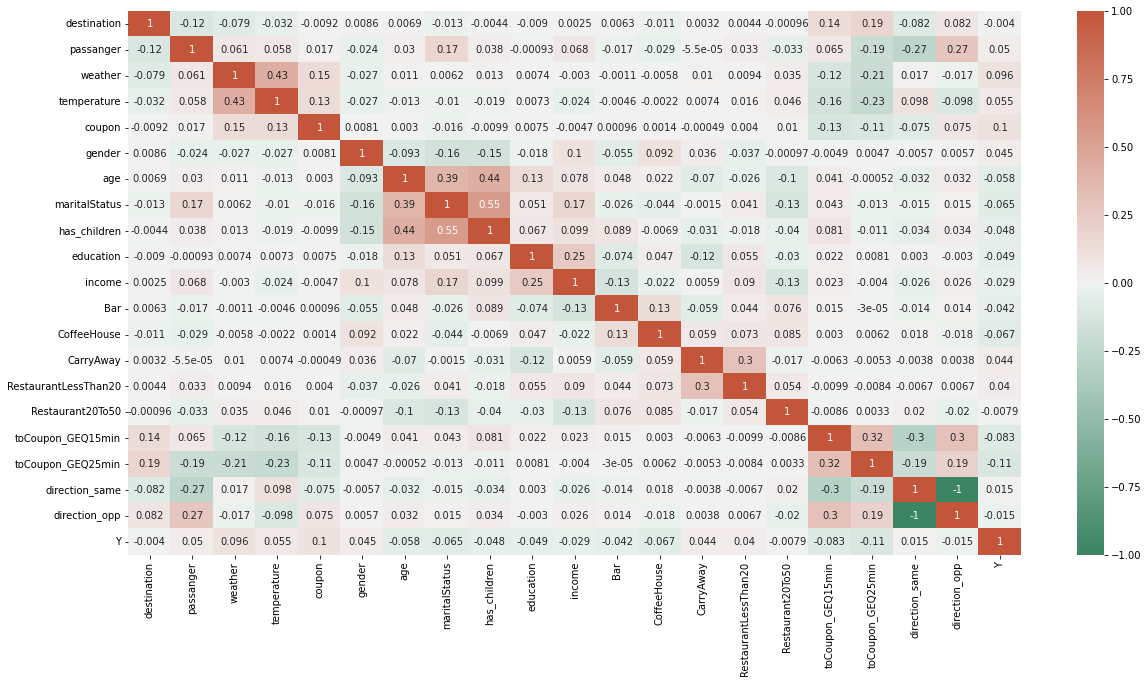

In [328]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(150,20,n=200),annot=True)

#Data Visualization

*1. Education*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


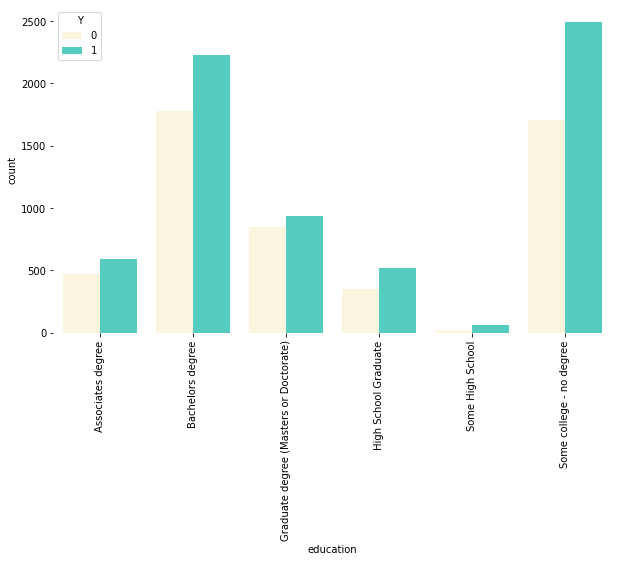

In [329]:
plt.figure(figsize=(10,6))
sns.countplot(df.sort_values('education').education,hue=df['Y'],palette=["cornsilk","turquoise"])
plt.xticks(rotation=90)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

*2. Occupation*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


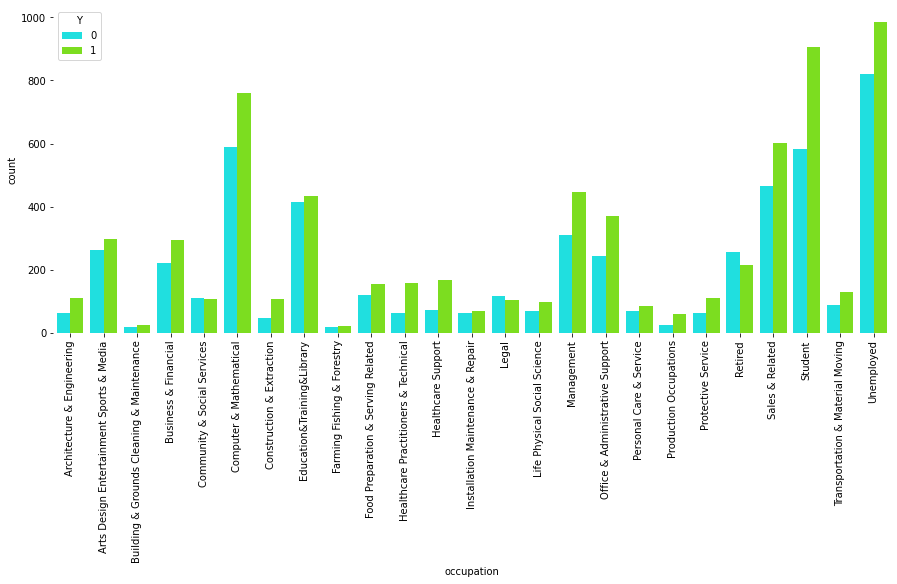

In [330]:
plt.figure(figsize=(15,6))
sns.countplot(df.sort_values('occupation').occupation,hue=df['Y'],palette=["cyan","lawngreen"])
plt.xticks(rotation=90)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

*3. Marital Status*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


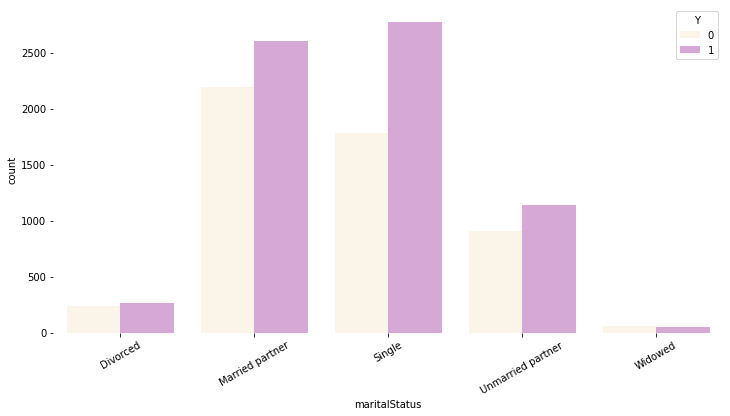

In [331]:
plt.figure(figsize=(12,6))
sns.countplot(df.sort_values('maritalStatus').maritalStatus,hue=df['Y'],palette=["oldlace","plum"])
plt.xticks(rotation=30)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

*4. Coupon Information*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


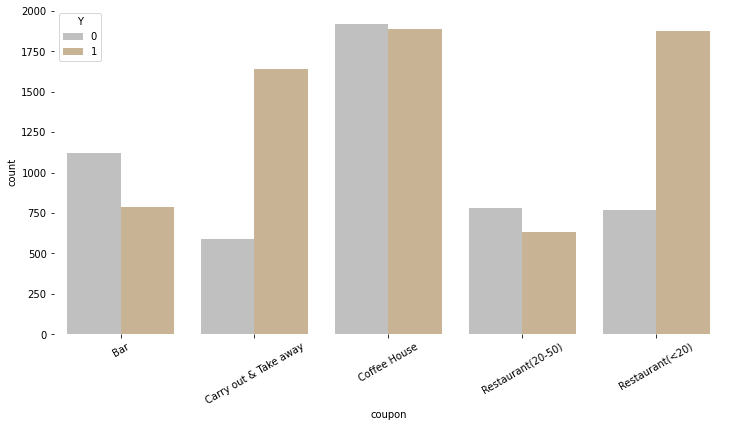

In [332]:
plt.figure(figsize=(12,6))
sns.countplot(df.sort_values('coupon').coupon,hue=df['Y'],palette=["silver","tan"])
plt.xticks(rotation=30)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


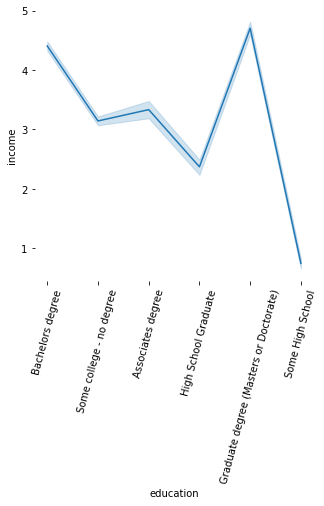

In [333]:
plt.figure(figsize=(5,5))
sns.lineplot(df['education'],df1['income'])
plt.xticks(rotation=75)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

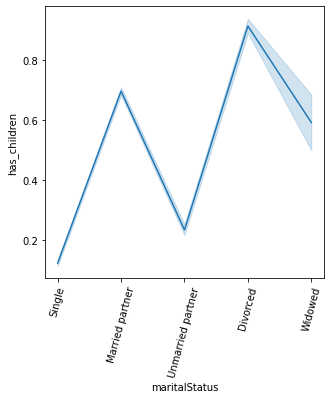

In [334]:
plt.figure(figsize=(5,5))
sns.lineplot(df['maritalStatus'],df['has_children'])
plt.xticks(rotation=75)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


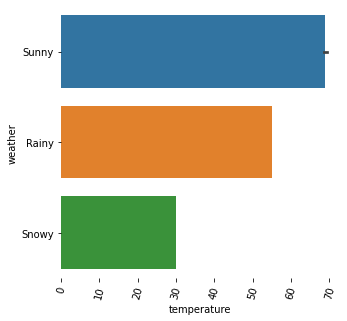

In [335]:
plt.figure(figsize=(5,5))
sns.barplot(df['temperature'],df['weather'])
plt.xticks(rotation=75)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [336]:
df1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,1,0,2,55,2PM,4,1d,1,1,0,...,5,0,3,3,0,0,0,0,1,1
23,1,1,2,80,10AM,2,2h,1,1,0,...,5,0,3,3,0,0,0,0,1,0
24,1,1,2,80,10AM,0,1d,1,1,0,...,5,0,3,3,0,0,0,0,1,1
25,1,1,2,80,10AM,1,2h,1,1,0,...,5,0,3,3,0,1,0,0,1,0
26,1,1,2,80,2PM,2,1d,1,1,0,...,5,0,3,3,0,0,0,0,1,0


*Model Preparation*

In [337]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler 

In [338]:
df1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [339]:
X=df1[['destination', 'passanger', 'weather', 'temperature', 'coupon','gender', 'age', 'maritalStatus', 'has_children',
       'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]

Y=df1[['Y']]

In [340]:
scaler=MinMaxScaler()

In [341]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.35)
print("Training Set:",(X_train.shape,Y_train.shape))
print('Test Set:',(X_test.shape,Y_test.shape))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Training Set: ((7804, 20), (7804, 1))
Test Set: ((4203, 20), (4203, 1))


In [342]:
# X_train=(X_train-X_train.mean())/X_train.std()
# X_test=(X_test-X_test.mean())/X_test.std()
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [343]:
print(Y_test.shape[1])

2


In [344]:
def classification():
  model=Sequential()
  model.add(Dense(500,input_shape=(20,),activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(100,activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(50,activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(2,activation='softmax'))

  model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
  return model

In [345]:
model=classification()
model.fit(X_train,Y_train,epochs=50,verbose=2,batch_size=20,validation_data=(X_test,Y_test))

Epoch 1/50
391/391 - 2s - loss: 0.6760 - accuracy: 0.5789 - val_loss: 0.6632 - val_accuracy: 0.6017 - 2s/epoch - 5ms/step
Epoch 2/50
391/391 - 1s - loss: 0.6644 - accuracy: 0.5948 - val_loss: 0.6657 - val_accuracy: 0.6062 - 1s/epoch - 4ms/step
Epoch 3/50
391/391 - 2s - loss: 0.6575 - accuracy: 0.6020 - val_loss: 0.6629 - val_accuracy: 0.6093 - 2s/epoch - 4ms/step
Epoch 4/50
391/391 - 2s - loss: 0.6551 - accuracy: 0.6070 - val_loss: 0.6583 - val_accuracy: 0.6108 - 2s/epoch - 6ms/step
Epoch 5/50
391/391 - 2s - loss: 0.6442 - accuracy: 0.6247 - val_loss: 0.6506 - val_accuracy: 0.6224 - 2s/epoch - 4ms/step
Epoch 6/50
391/391 - 1s - loss: 0.6399 - accuracy: 0.6335 - val_loss: 0.6455 - val_accuracy: 0.6253 - 1s/epoch - 3ms/step
Epoch 7/50
391/391 - 1s - loss: 0.6318 - accuracy: 0.6430 - val_loss: 0.6402 - val_accuracy: 0.6336 - 1s/epoch - 4ms/step
Epoch 8/50
391/391 - 1s - loss: 0.6285 - accuracy: 0.6460 - val_loss: 0.6385 - val_accuracy: 0.6407 - 1s/epoch - 3ms/step
Epoch 9/50
391/391 - 1s 

In [350]:
score=model.evaluate(X_test,Y_test,verbose=2)
round(score[1]*100,2)

132/132 - 0s - loss: 0.6844 - accuracy: 0.6828 - 225ms/epoch - 2ms/step


68.28